<a href="https://colab.research.google.com/github/MehdiMitiche/PyTorch-Clothes-Classifier-FashionMinist/blob/main/PyTorch_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy
!pip install matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 159.3MB 84kB/s 
     |████████████████████████████████| 11.8MB 23.5MB/s 
     |████████████████████████████████| 7.6MB 2.4MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [20]:
import torch
from torchvision import transforms, datasets
from torch import nn
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
#Creating our Model
model = nn.Sequential(nn.Linear(784,392),
                      nn.ReLU(),
                      nn.Linear(392,196),
                      nn.ReLU(),
                      nn.Linear(196,98),
                      nn.ReLU(),
                      nn.Linear(98,49),
                      nn.ReLU(),
                      nn.Linear(49,10),
                      nn.LogSoftmax(dim=1))

#creating our optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)
#Defining our loss function 
cretirion = nn.NLLLoss()

#Number of epochs
epochs = 5

for e in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)

    optimizer.zero_grad()

    score = model(images)
    loss = cretirion(score,labels)

    

    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")




Training loss: 0.7536737461810681


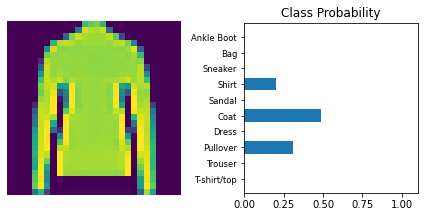

In [57]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)